In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dlnpyutils import coords, parallax

In [9]:
df = pd.read_csv("table.csv", names = ["ID", "mjd", "ra", "dec", "mag_auto", "raerr", "decerr", "filter"])
df2 = pd.read_csv("tablemeas.csv", names = ["ID", "pmra", "pmdec"])
uniqueID = np.unique(df["ID"])

In [10]:
def plotsave(idv):
    plt.ioff()
    ind, = np.where(idv == df["ID"])
    dfnew = df.loc[df['ID'] == idv]
    mjd = np.array(df["mjd"][ind])
    ra = np.array(df["ra"][ind])
    dec = np.array(df["dec"][ind])
    mag = np.array(df["mag_auto"][ind])
    filters = np.array(df["filter"][ind])
    fig, axs = plt.subplots(3,2, figsize = (12,16))
    plt.subplots_adjust(hspace = .4, wspace = .3)
    plt.subplot(3,2,1)
    plt.title(idv)
    mjd -= min(mjd)
    mjd = (mjd)+1
    cenra = np.mean(ra)
    cendec = np.mean(dec)
    dra, ddec = coords.rotsphcen(ra, dec, cenra, cendec, gnomic = True)
    dra = dra*3600
    ddec = ddec*3600
    goodind = np.where(np.logical_and(abs(ddec) < 500, abs(dra) < 500))             
    ddec = ddec[goodind]
    dra = dra[goodind]
    mjd = mjd[goodind]
    filters = filters[goodind]
    mag = mag[goodind]
    
    #radec code
    p1 = plt.scatter(dra, ddec, c = mjd, s = 6)
    diffra = max(dra) - min(dra)
    diffdec = max(ddec) - min(ddec)
    plt.xlim(min(dra) - diffra/12, max(dra) + diffra/12)
    plt.ylim(min(ddec) - diffdec/12, max(ddec) + diffdec/12)
    m, b = np.polyfit(dra, ddec, 1)
    plt.plot(dra, m*dra + b, c = "k")
    plt.colorbar()
    plt.xlabel("dra")
    plt.ylabel("ddec")
    
    #ratime
    plt.subplot(3,2,2)
    plt.scatter(mjd, dra, s = 6)
    diffmjd = max(mjd) - min(mjd)
    plt.xlim(min(mjd) - diffmjd/16,  max(mjd) + diffmjd/16)
    plt.ylim(min(dra) - diffra/12, max(dra) + diffra/12)
    m, b = np.polyfit(mjd, dra, 1)
    plt.plot(mjd, m*mjd + b, c = "k")
    plt.xlabel("MJD")
    plt.ylabel("dra")
    
    #dectime
    plt.subplot(3,2,3)
    plt.scatter(mjd, ddec, s = 6)
    plt.xlim(min(mjd) - diffmjd/16,  max(mjd) + diffmjd/16)
    plt.ylim(min(ddec) - diffdec/12, max(ddec) + diffdec/12)
    m, b = np.polyfit(mjd, ddec, 1)
    plt.plot(mjd, m*mjd + b, c = "k")
    plt.xlabel("MJD")
    plt.ylabel("ddec")
    
    #magtime
    plt.subplot(3,2,4)
    count = 0
    colors = ["r", "g", "b", "y", "c", "m", "orange", "pink", "gray", "black", "purple"]
    for fil in np.unique(filters):
        filind = np.where(filters == fil)
        plt.scatter(mjd[filind], mag[filind], c = colors[count], label = fil, s = 6)
        count+=1
    plt.legend()
    diffmag = max(mag) - min(mag)
    plt.xlim(min(mjd) - diffmjd/16,  max(mjd) + diffmjd/16)
    plt.ylim(min(mag) - diffmag/12, max(mag) + diffmag/12)
    plt.xlabel("MJD")
    plt.ylabel("MAG")
    #parallax
    fig.delaxes(axs[2][1])
    plt.subplot(3,2,5)
    pars, cov = parallax.fit(dfnew)
    parallax.plotfit(dfnew,pars, cov)
    
    #saving
    path = "fixedfigs2/"
    picname = idv
    savepng = path+picname
    plt.savefig(savepng, bbox_inches = 'tight')
    plt.close()

In [61]:
def plotsavefinal(idv):
    plt.ioff()
    try:
        ind, = np.where(idv == df["ID"])
        dfnew = df.loc[df['ID'] == idv]
        mjd = np.array(df["mjd"][ind])
        mjd -= min(mjd)
        ra = np.array(df["ra"][ind])
        dec = np.array(df["dec"][ind])
        mag = np.array(df["mag_auto"][ind])
        filters = np.array(df["filter"][ind])
        cenra = np.mean(ra)
        cendec = np.mean(dec)
        ind2, = np.where(idv == df2["ID"])
        dfnew2 = df2.loc[df2['ID'] == idv]
        pmra = np.array(df2["pmra"][ind2])
        pmdec = np.array(df2["pmdec"][ind2])
        pmra = np.mean(pmra)
        pmdec = np.mean(pmdec)
        plt.subplots(2,2, figsize = (12,8))
        plt.subplots_adjust(hspace = .4, wspace = .4)
        plt.suptitle(idv)
        colors = ["b", "g", "r", "c", "y"]
    #     dra, ddec = coords.rotsphcen(meas["ra"], meas["dec"], cenra, cendec, gnomic = True)
        dra = ra - cenra
        dra *= 3600 * np.cos(np.deg2rad(cendec))
        ddec = dec - cendec
        ddec *= 3600
        t = mjd - np.mean(mjd)
        pmra = pmra/1000/365.2425 # mas/yr -> as/day
        pmdec = pmdec/1000/365.2425

        #plt.plot(t,dra)
        #plt.plot(t,t*pmra)


    #     dra = dra*3600
    #     ddec = ddec*3600
        goodind = np.where(np.logical_and(abs(ddec) < 500, abs(dra) < 500))             
        ddec = ddec[goodind]
        dra = dra[goodind]
        mjd = mjd[goodind]
        filters = filters[goodind]
        mag = mag[goodind]
        meandra = np.mean(dra)
        meanddec = np.mean(ddec)
        #radec code
        plt.subplot(2,2,1)
        plt.scatter(dra, ddec, c = mjd, s = 20)
        diffra = max(dra) - min(dra)
        diffdec = max(ddec) - min(ddec)
        plt.xlim(min(dra) - diffra/4, max(dra) + diffra/4)
        plt.ylim(min(ddec) - diffdec/4, max(ddec) + diffdec/4)
        m, b = np.polyfit(dra, ddec, 1)
        plt.plot(dra, m*dra + b, c = "k")
        plt.colorbar()
        plt.xlabel("dra")
        plt.ylabel("ddec")

        #ratime
        plt.subplot(2,2,2)
        count = 0
        for fil in np.unique(filters):
            filind = np.where(filters == fil)
            plt.scatter(mjd[filind], dra[filind], c = colors[count], label = fil, s = 20)
            count+=1
        plt.legend()
    #     plt.scatter(mjd, dra, s = 20)
    #     plt.errorbar(mjd, dra, yerr = meas["raerr"], ls = "none")
        diffmjd = max(mjd) - min(mjd)
        plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
        plt.ylim(min(dra) - diffra/4, max(dra) + diffra/4)
        m, b = np.polyfit(mjd, dra, 1)
        plt.plot(mjd, mjd*pmra+b, c = "k")
        plt.xlabel("MJD")
        plt.ylabel("dra")

        #dectime
        plt.subplot(2,2,4)
        count = 0
        for fil in np.unique(filters):
            filind = np.where(filters == fil)
            plt.scatter(mjd[filind], ddec[filind], c = colors[count], label = fil, s = 20)
            count+=1
        plt.legend()
    #     plt.scatter(mjd, ddec, s = 20)
        plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
        plt.ylim(min(ddec) - diffdec/4, max(ddec) + diffdec/4)
        m, b = np.polyfit(mjd, ddec, 1)
        plt.plot(mjd, mjd*pmdec+b, c = "k")
        plt.xlabel("MJD")
        plt.ylabel("ddec")

        #magtime
        plt.subplot(2,2,3)
        count = 0
        for fil in np.unique(filters):
            filind = np.where(filters == fil)
            plt.scatter(mjd[filind], mag[filind], c = colors[count], label = fil, s = 20)
            count+=1
        plt.legend()
        diffmag = max(mag) - min(mag)
        plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
        plt.ylim(min(mag) - diffmag/4, max(mag) + diffmag/4)
        plt.xlabel("MJD")
        plt.ylabel("MAG")

        path = "figpicsfinal/"
        picname = idv
        savepng = path+picname
        plt.savefig(savepng, bbox_inches = 'tight')
        plt.close()
    except:
        print(idv)

In [51]:
def bugfix(idv):
    plt.ion()
    ind, = np.where(idv == df["ID"])
    dfnew = df.loc[df['ID'] == idv]
    mjd = np.array(df["mjd"][ind])
    print(mjd)
    mjd -= min(mjd)
    ra = np.array(df["ra"][ind])
    dec = np.array(df["dec"][ind])
    mag = np.array(df["mag_auto"][ind])
    filters = np.array(df["filter"][ind])
    cenra = np.mean(ra)
    cendec = np.mean(dec)
    ind2, = np.where(idv == df2["ID"])
    dfnew2 = df2.loc[df2['ID'] == idv]
    pmra = np.array(df2["pmra"][ind2])
    pmdec = np.array(df2["pmdec"][ind2])

    plt.subplots(2,2, figsize = (12,8))
    plt.subplots_adjust(hspace = .4, wspace = .4)
    plt.suptitle(idv)
    colors = ["b", "g", "r", "c", "y"]
#     dra, ddec = coords.rotsphcen(meas["ra"], meas["dec"], cenra, cendec, gnomic = True)
    dra = ra - cenra
    dra *= 3600 * np.cos(np.deg2rad(cendec))
    ddec = dec - cendec
    ddec *= 3600
    t = mjd - np.mean(mjd)
    pmra = pmra/1000/365.2425 # mas/yr -> as/day
    pmdec = pmdec/1000/365.2425

    #plt.plot(t,dra)
    #plt.plot(t,t*pmra)


#     dra = dra*3600
#     ddec = ddec*3600
    goodind = np.where(np.logical_and(abs(ddec) < 500, abs(dra) < 500))             
    ddec = ddec[goodind]
    dra = dra[goodind]
    mjd = mjd[goodind]
    filters = filters[goodind]
    mag = mag[goodind]
    meandra = np.mean(dra)
    meanddec = np.mean(ddec)
    #radec code
    plt.subplot(2,2,1)
    plt.scatter(dra, ddec, c = mjd, s = 20)
    diffra = max(dra) - min(dra)
    diffdec = max(ddec) - min(ddec)
    plt.xlim(min(dra) - diffra/4, max(dra) + diffra/4)
    plt.ylim(min(ddec) - diffdec/4, max(ddec) + diffdec/4)
    m, b = np.polyfit(dra, ddec, 1)
    plt.plot(dra, m*dra + b, c = "k")
    plt.colorbar()
    plt.xlabel("dra")
    plt.ylabel("ddec")

    #ratime
    plt.subplot(2,2,2)
    print(pmra)
    count = 0
    for fil in np.unique(filters):
        filind = np.where(filters == fil)
        plt.scatter(mjd[filind], dra[filind], c = colors[count], label = fil, s = 20)
        count+=1
    plt.legend()
#     plt.scatter(mjd, dra, s = 20)
#     plt.errorbar(mjd, dra, yerr = meas["raerr"], ls = "none")
    diffmjd = max(mjd) - min(mjd)
    plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
    plt.ylim(min(dra) - diffra/4, max(dra) + diffra/4)
    m, b = np.polyfit(mjd, dra, 1)
    plt.plot(mjd, mjd*pmra+b, c = "k")
    plt.xlabel("MJD")
    plt.ylabel("dra")

    #dectime
    plt.subplot(2,2,4)
    count = 0
    for fil in np.unique(filters):
        filind = np.where(filters == fil)
        plt.scatter(mjd[filind], ddec[filind], c = colors[count], label = fil, s = 20)
        count+=1
    plt.legend()
#     plt.scatter(mjd, ddec, s = 20)
    plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
    plt.ylim(min(ddec) - diffdec/4, max(ddec) + diffdec/4)
    m, b = np.polyfit(mjd, ddec, 1)
    plt.plot(mjd, mjd*pmdec+b, c = "k")
    plt.xlabel("MJD")
    plt.ylabel("ddec")

    #magtime
    plt.subplot(2,2,3)
    count = 0
    for fil in np.unique(filters):
        filind = np.where(filters == fil)
        plt.scatter(mjd[filind], mag[filind], c = colors[count], label = fil, s = 20)
        count+=1
    plt.legend()
    diffmag = max(mag) - min(mag)
    plt.xlim(min(mjd) - diffmjd/4,  max(mjd) + diffmjd/4)
    plt.ylim(min(mag) - diffmag/4, max(mag) + diffmag/4)
    plt.xlabel("MJD")
    plt.ylabel("MAG")

107313_71146
143180_169725
168980_3583
180886_44691
185257_1173
95949_4141
97015_257
97574_2353


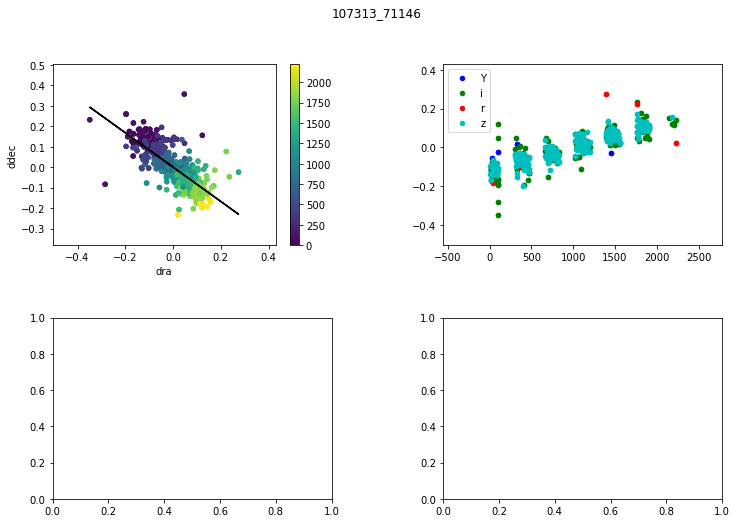

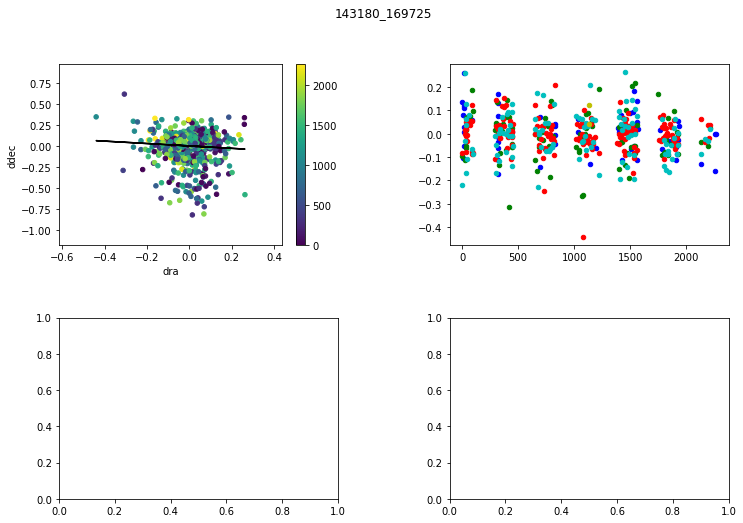

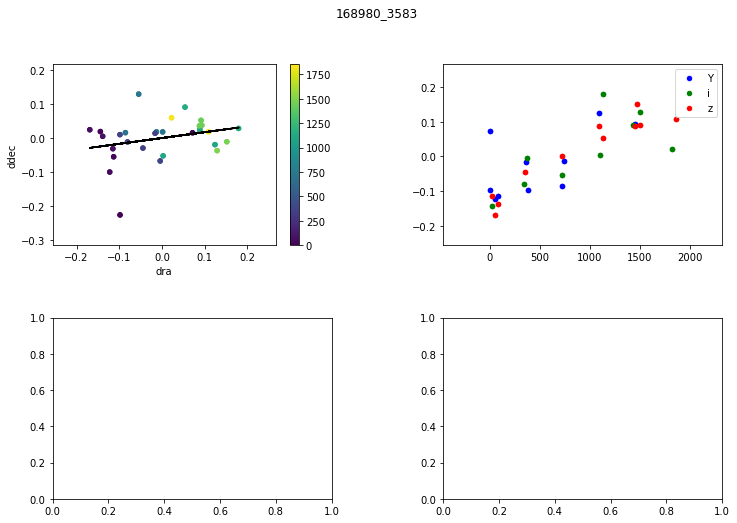

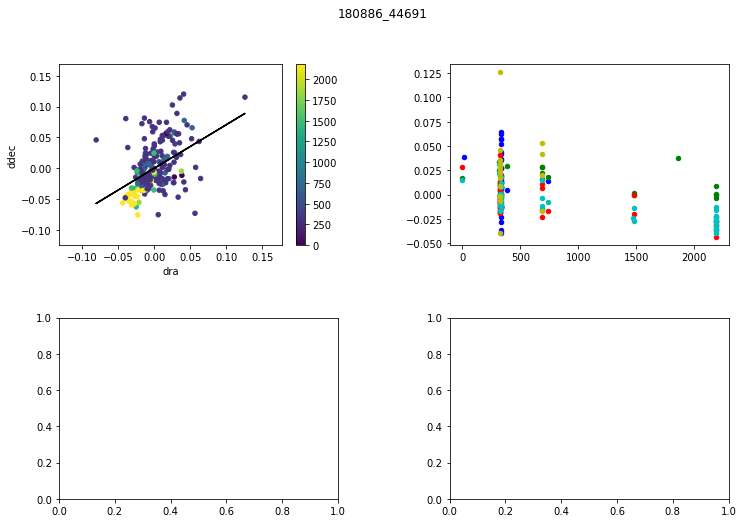

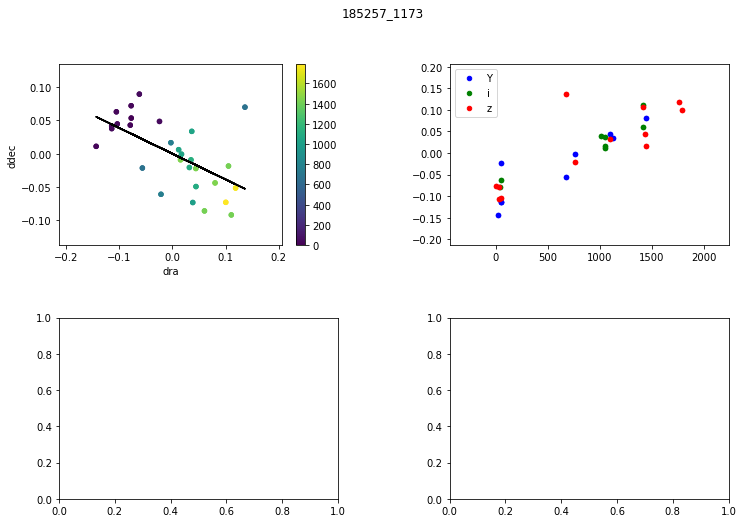

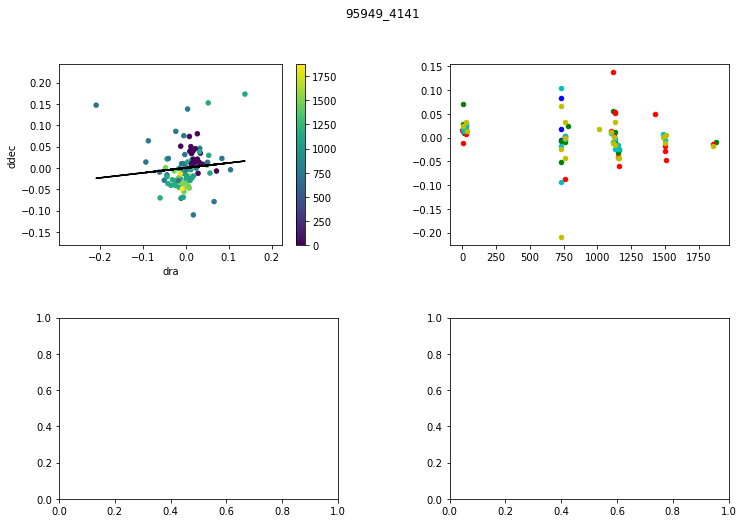

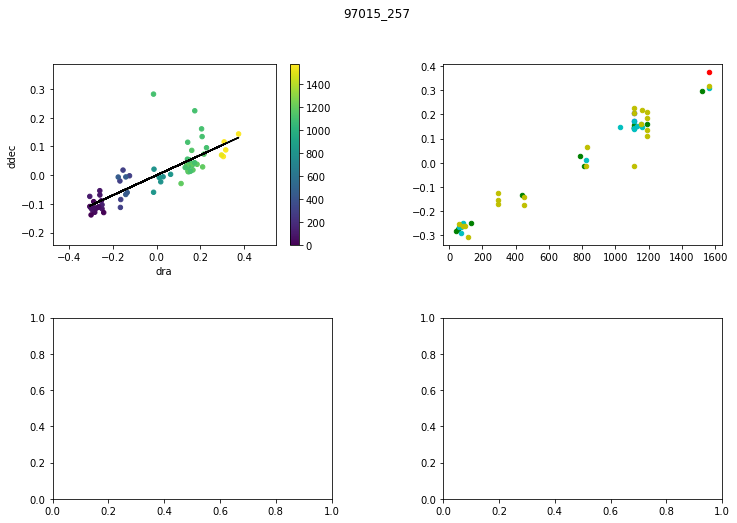

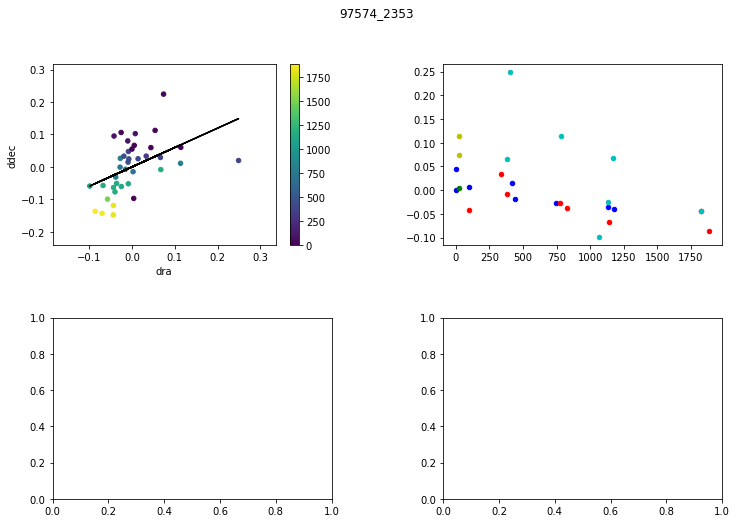

In [38]:
for i in uniqueID:
    plotsavefinal(i)

In [60]:
errorid = [107313_71146,143180_169725,168980_3583,180886_44691,185257_1173,95949_4141,97015_257,97574_2353]

In [62]:
plotsavefinal("107313_71146")